# **Sentiment Analysis - Amazon Reviews**

In [33]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests

## Scraping reviews from Amazon.in


In [81]:
# Scraped the most recent reviews from first 200 pages.
op=[]
alexa_reviews=[]
for i in range (1,200):
    url = f"https://www.amazon.com/Amazon-com-Amazon-Alexa/product-reviews/B00P03D4D2/ref=cm_cr_arp_d_viewopt_srt?sortBy=recent&pageNumber={i}"
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",class_='review-text')
    for j in range(len(reviews)):
        op.append(reviews[j].text)    
    alexa_reviews = alexa_reviews+op

In [82]:
reviews_df = pd.DataFrame({'reviews':alexa_reviews})

In [83]:
reviews_df

,reviews
0,\nI found this very easy to set up. I like the...
1,"\nNot reliable, works one day then not the nex..."
2,"\nI love Alexa dot, she reminds me when to tak..."
3,\nGiven th high amount of functions this app o...
4,\nAlexa app is inconsistent in performance. Ne...
...,...
4965,\nWhy is the Echo dot not compatible with my n...
4966,"\nThe app is good for some basic automation, a..."
4967,\nI used to be able to sign in on my PC and se...
4968,\nlove This Alexa Dot\n


In [108]:
# Stored the data in csv file.
reviews_df.to_csv('alexa_reviews.csv')

## Text Preprocessing

In [84]:
#Cleaned the data.

import re
def clean_data(text):
  text = re.sub(r'\n+','',text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = text.replace('The media could not be loaded.',' ')
  
  return text

In [85]:
reviews_df['reviews']=  reviews_df['reviews'].apply(clean_data)

In [86]:
reviews_df

,reviews
0,I found this very easy to set up. I like the f...
1,"Not reliable, works one day then not the next!"
2,"I love Alexa dot, she reminds me when to take ..."
3,Given th high amount of functions this app off...
4,Alexa app is inconsistent in performance. Need...
...,...
4965,Why is the Echo dot not compatible with my new...
4966,"The app is good for some basic automation, and..."
4967,I used to be able to sign in on my PC and see ...
4968,love This Alexa Dot


In [87]:
# Created a function to get the subjectivity.

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Created a function to get the polarity.

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# Created two new columns for subjectivity and polarity and applying the functions.

reviews_df['Subjectivity'] = reviews_df['reviews'].apply(get_subjectivity)
reviews_df['Polarity'] = reviews_df['reviews'].apply(get_polarity)

reviews_df

,reviews,Subjectivity,Polarity
0,I found this very easy to set up. I like the f...,0.463386,0.134580
1,"Not reliable, works one day then not the next!",0.000000,0.000000
2,"I love Alexa dot, she reminds me when to take ...",0.450000,0.350000
3,Given th high amount of functions this app off...,0.586065,0.457917
4,Alexa app is inconsistent in performance. Need...,0.556250,-0.100000
...,...,...,...
4965,Why is the Echo dot not compatible with my new...,0.184848,0.103788
4966,"The app is good for some basic automation, and...",0.473571,0.149524
4967,I used to be able to sign in on my PC and see ...,0.375000,0.233333
4968,love This Alexa Dot,0.600000,0.500000


## Tokenizing and creating a WordCloud

In [88]:
#Converted Tweets column to a single paragraph(For using spacy).
reviews_str = [reviews.strip() for reviews in reviews_df.reviews]
reviews_str = [reviews for reviews in reviews_str if reviews]
reviews_str =  ' '.join(reviews_str)
reviews_str

'I found this very easy to set up. I like the first one so much that I ended up getting two more when Amazon had them on special. I now have three. I configured them singly two of them upstairs and then later the third one down stairs. I do get frustrated that they don\'t always do what I tell them to do. For instance if I asked that a song be skipped it gets Alexa gets confused. One of them will do it in the other two won\'t. Or worse I will tell Alexa to shut the music down and one will and the others won\'t. I find myself wanting to argue with them like they are teenagers. I know that\'s a rational so I don\'t but that is the frustrating thing. On the other hand the sound is great I love that I can set timers I can ask what time it is what the weather is like and so forth right when I\'m in the middle of cooking or doing a project. Very very convenient. Now that it\'s summer I can put them in the window sills and sit out at the fire pit and control music from there. Not as good as h

In [89]:
#imported spacy
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(reviews_str)
len(doc)

178806

In [90]:
#Tokenized
Tokens = [token.text for token in doc]

In [91]:
Tokens

['I',
 'found',
 'this',
 'very',
 'easy',
 'to',
 'set',
 'up',
 '.',
 'I',
 'like',
 'the',
 'first',
 'one',
 'so',
 'much',
 'that',
 'I',
 'ended',
 'up',
 'getting',
 'two',
 'more',
 'when',
 'Amazon',
 'had',
 'them',
 'on',
 'special',
 '.',
 'I',
 'now',
 'have',
 'three',
 '.',
 'I',
 'configured',
 'them',
 'singly',
 'two',
 'of',
 'them',
 'upstairs',
 'and',
 'then',
 'later',
 'the',
 'third',
 'one',
 'down',
 'stairs',
 '.',
 'I',
 'do',
 'get',
 'frustrated',
 'that',
 'they',
 'do',
 "n't",
 'always',
 'do',
 'what',
 'I',
 'tell',
 'them',
 'to',
 'do',
 '.',
 'For',
 'instance',
 'if',
 'I',
 'asked',
 'that',
 'a',
 'song',
 'be',
 'skipped',
 'it',
 'gets',
 'Alexa',
 'gets',
 'confused',
 '.',
 'One',
 'of',
 'them',
 'will',
 'do',
 'it',
 'in',
 'the',
 'other',
 'two',
 'wo',
 "n't",
 '.',
 'Or',
 'worse',
 'I',
 'will',
 'tell',
 'Alexa',
 'to',
 'shut',
 'the',
 'music',
 'down',
 'and',
 'one',
 'will',
 'and',
 'the',
 'others',
 'wo',
 "n't",
 '.',
 'I'

In [92]:
#Removed stop words
import nltk
my_stop_words = nlp.Defaults.stop_words
no_stop_tokens = [word for word in Tokens if not word in my_stop_words]

no_stop_tokens

['I',
 'found',
 'easy',
 'set',
 '.',
 'I',
 'like',
 'I',
 'ended',
 'getting',
 'Amazon',
 'special',
 '.',
 'I',
 '.',
 'I',
 'configured',
 'singly',
 'upstairs',
 'later',
 'stairs',
 '.',
 'I',
 'frustrated',
 'I',
 'tell',
 '.',
 'For',
 'instance',
 'I',
 'asked',
 'song',
 'skipped',
 'gets',
 'Alexa',
 'gets',
 'confused',
 '.',
 'One',
 'wo',
 '.',
 'Or',
 'worse',
 'I',
 'tell',
 'Alexa',
 'shut',
 'music',
 'wo',
 '.',
 'I',
 'find',
 'wanting',
 'argue',
 'like',
 'teenagers',
 '.',
 'I',
 'know',
 'rational',
 'I',
 'frustrating',
 'thing',
 '.',
 'On',
 'hand',
 'sound',
 'great',
 'I',
 'love',
 'I',
 'set',
 'timers',
 'I',
 'ask',
 'time',
 'weather',
 'like',
 'forth',
 'right',
 'I',
 'middle',
 'cooking',
 'project',
 '.',
 'Very',
 'convenient',
 '.',
 'Now',
 'summer',
 'I',
 'window',
 'sills',
 'sit',
 'fire',
 'pit',
 'control',
 'music',
 '.',
 'Not',
 'good',
 'having',
 'trees',
 'wired',
 'pretty',
 'close',
 '.',
 'I',
 'old',
 'person',
 'I',
 'enjoyin

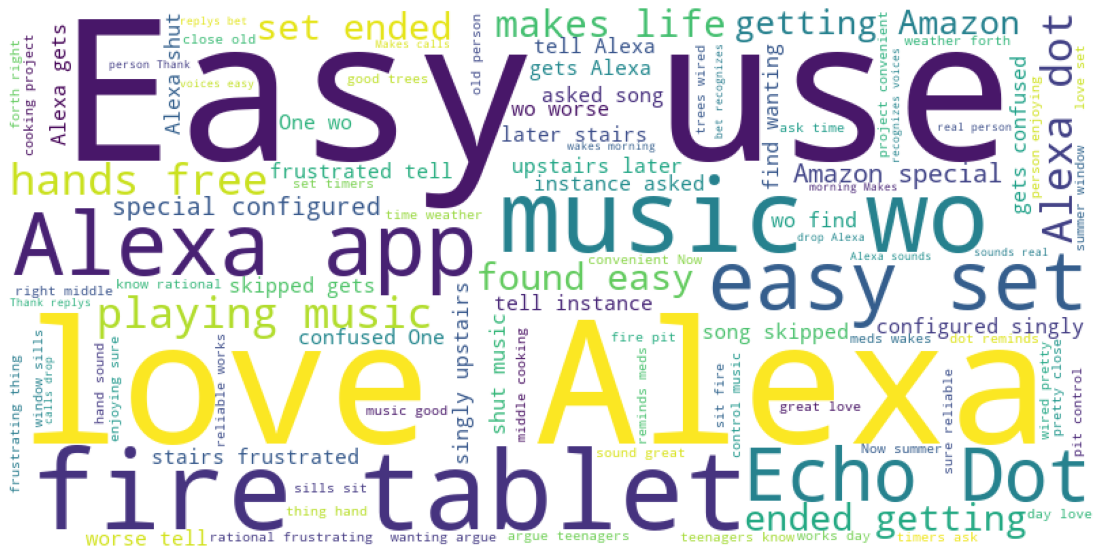

In [106]:
#Imported wordclound and matplotlib
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Plotted a word cloud with the tokens.
allwords = ' '.join([reviews for reviews in no_stop_tokens])
plt.figure(figsize=(20,10))
cloud = WordCloud(background_color = "white", max_words = 100,  stopwords = set(STOPWORDS), width=800, height=400)
cloud.generate(allwords)
plt.axis("off")
plt.imshow(cloud)
plt.show()

In [94]:
#Created a function to compute the negative, neutral and postitive analysis.

def get_analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'Positive'

reviews_df['Analysis'] = reviews_df['Polarity'].apply(get_analysis)

reviews_df

,reviews,Subjectivity,Polarity,Analysis
0,I found this very easy to set up. I like the f...,0.463386,0.134580,Positive
1,"Not reliable, works one day then not the next!",0.000000,0.000000,neutral
2,"I love Alexa dot, she reminds me when to take ...",0.450000,0.350000,Positive
3,Given th high amount of functions this app off...,0.586065,0.457917,Positive
4,Alexa app is inconsistent in performance. Need...,0.556250,-0.100000,Negative
...,...,...,...,...
4965,Why is the Echo dot not compatible with my new...,0.184848,0.103788,Positive
4966,"The app is good for some basic automation, and...",0.473571,0.149524,Positive
4967,I used to be able to sign in on my PC and see ...,0.375000,0.233333,Positive
4968,love This Alexa Dot,0.600000,0.500000,Positive


In [95]:
# sorted & Printed the positive Tweets.
j = 1
sorted_data = reviews_df.sort_values(by=['Polarity'])
for i in range(0, sorted_data.shape[0]):
  if (sorted_data['Analysis'][i] == 'Positive'):
    print(str(j)+ ') '+sorted_data['reviews'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
337) I love Alexa dot, she reminds me when to take my meds, wakes me up in the morning. Makes calls for me, just say drop in to  name. Alexa sounds like a real person, I say Thank you and she replys you bet.She recognizes our voices,easy to use. And informs us when a package is at our front door. Can't do without her.

338) Given th high amount of functions this app offers, it is still very straightforward to use. Love it, I'm sure Alexa does too :D

339) Can see can feed on echo but stopped working recently on fire tablet. Getting live view not supported message

340) Is a excellent Amazon Alexa

341) Works fantastic

342) Seemless integration between devices and with Kasa app and smartplugs. Awesome.  And we love the reminders as well. Keeps everyone on track.

343) Easy to use.. I wish I bought it sooner..

344) Why does it KEEP. POPPING UP. Especially when I plug in my headphones. For now i shall rate this one star, if it is fixed 

## **Plotting the Sentiment Analysis**

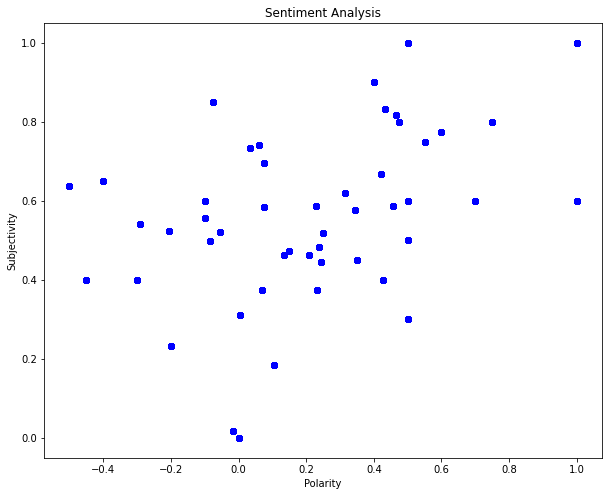

In [96]:
# Plotted the Polarity and Subjectivity
plt.figure(figsize=(10,8))
for i in range(0, reviews_df.shape[0]):
  plt.scatter(reviews_df['Polarity'][i], reviews_df['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


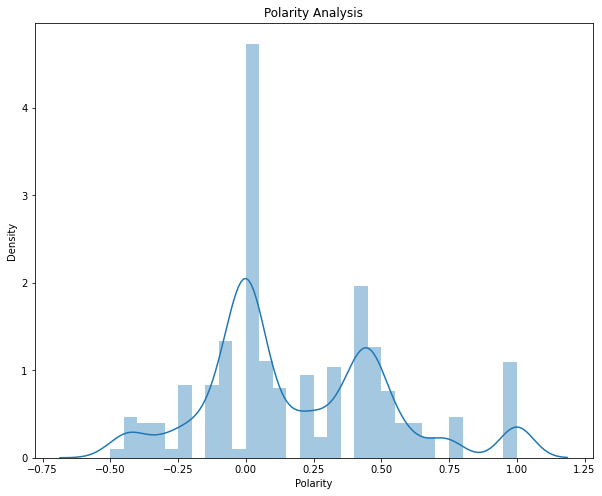

In [97]:
# plotted a density plot for polarity
import seaborn as sn
plt.figure(figsize=(10,8))
sn.distplot(reviews_df['Polarity'])
plt.title('Polarity Analysis')
plt.xlabel('Polarity')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


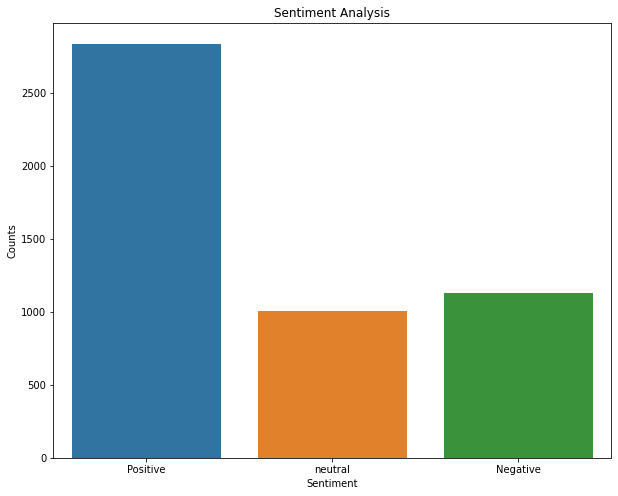

In [98]:
#Count plot
plt.figure(figsize=(10,8))
sn.countplot(reviews_df['Analysis'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()